In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [1]:
from google.colab import files
upload = files.upload()

Saving survey lung cancer.csv to survey lung cancer.csv


In [3]:
data = pd.read_csv("survey lung cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [18]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
data["GENDER"] = data["GENDER"].str.replace("M","2").str.replace("F","1")
data["GENDER"] = pd.to_numeric(data["GENDER"],downcast="integer")

In [7]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,2,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,2,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,2,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [130]:
x = data.drop("LUNG_CANCER",axis=1)
y = data["LUNG_CANCER"]
xt,xs,yt,ys = train_test_split(x,y,test_size=0.20,random_state=42)

In [10]:
param = { 'max_iter': [150,300,500,1000], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'] }
grid = GridSearchCV(LogisticRegression(),param,cv=5).fit(xt,yt)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

{'C': 100, 'max_iter': 150, 'penalty': 'l1', 'solver': 'liblinear'}

In [11]:
grid.best_score_

0.9191836734693878

In [12]:
param = { 'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan'] }
grid = GridSearchCV(KNeighborsClassifier(),param,cv=5).fit(xt,yt)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [13]:
grid.best_score_

0.8786122448979592

In [14]:
param = { 'max_depth': [5, 10, 15, 20, 25,40,50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4] }
grid = GridSearchCV(DecisionTreeClassifier(),param,cv=5).fit(xt,yt)
grid.best_params_

{'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [15]:
grid.best_score_

0.8743673469387755

In [16]:
param = { 'n_estimators': [50, 100, 200], 'max_depth': [10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4] }
grid = GridSearchCV(RandomForestClassifier(),param,cv=5).fit(xt,yt)
grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [17]:
grid.best_score_

0.8988571428571429

In [131]:
log = LogisticRegression(C = 100, max_iter = 150, penalty = 'l1', solver = 'liblinear').fit(xt,yt)
log_pred = log.predict(xs)
print(f"LogisticRegression Accuracy: {accuracy_score(ys,log_pred):0.2%}")
#THERE'S NO PROBLEM WITH THIS HIGH ACCURACY WE CHECKED THE ACCURACY ALREADY WITH THE CROSS VALIDATION BEFORE AND IT WAS FINE ACCURACY

LogisticRegression Accuracy: 98.39%


In [107]:
target = data["LUNG_CANCER"].unique()
target

array([1, 0], dtype=int8)

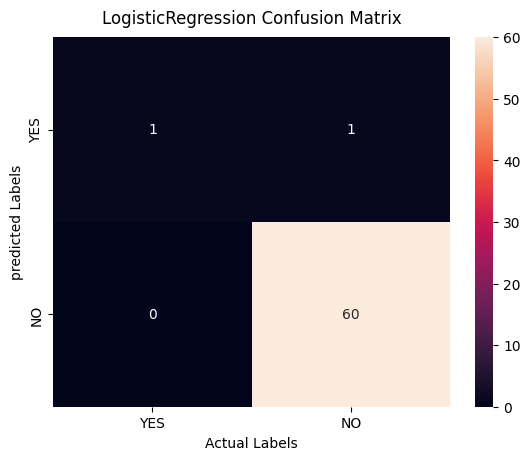

In [30]:
conf = confusion_matrix(ys,log_pred)
plt.title("LogisticRegression Confusion Matrix",pad=10)
a = sns.heatmap(conf,annot=True,fmt='g')
a.set_xticklabels(target)
a.set_yticklabels(target)
plt.xlabel("Actual Labels")
plt.ylabel("predicted Labels")
plt.show()

In [29]:
len(ys) #Weird split

62

In [48]:
data["LUNG_CANCER"] = data["LUNG_CANCER"].str.replace("YES","1").str.replace("NO","0")
data["LUNG_CANCER"] = pd.to_numeric(data["LUNG_CANCER"],downcast="integer")

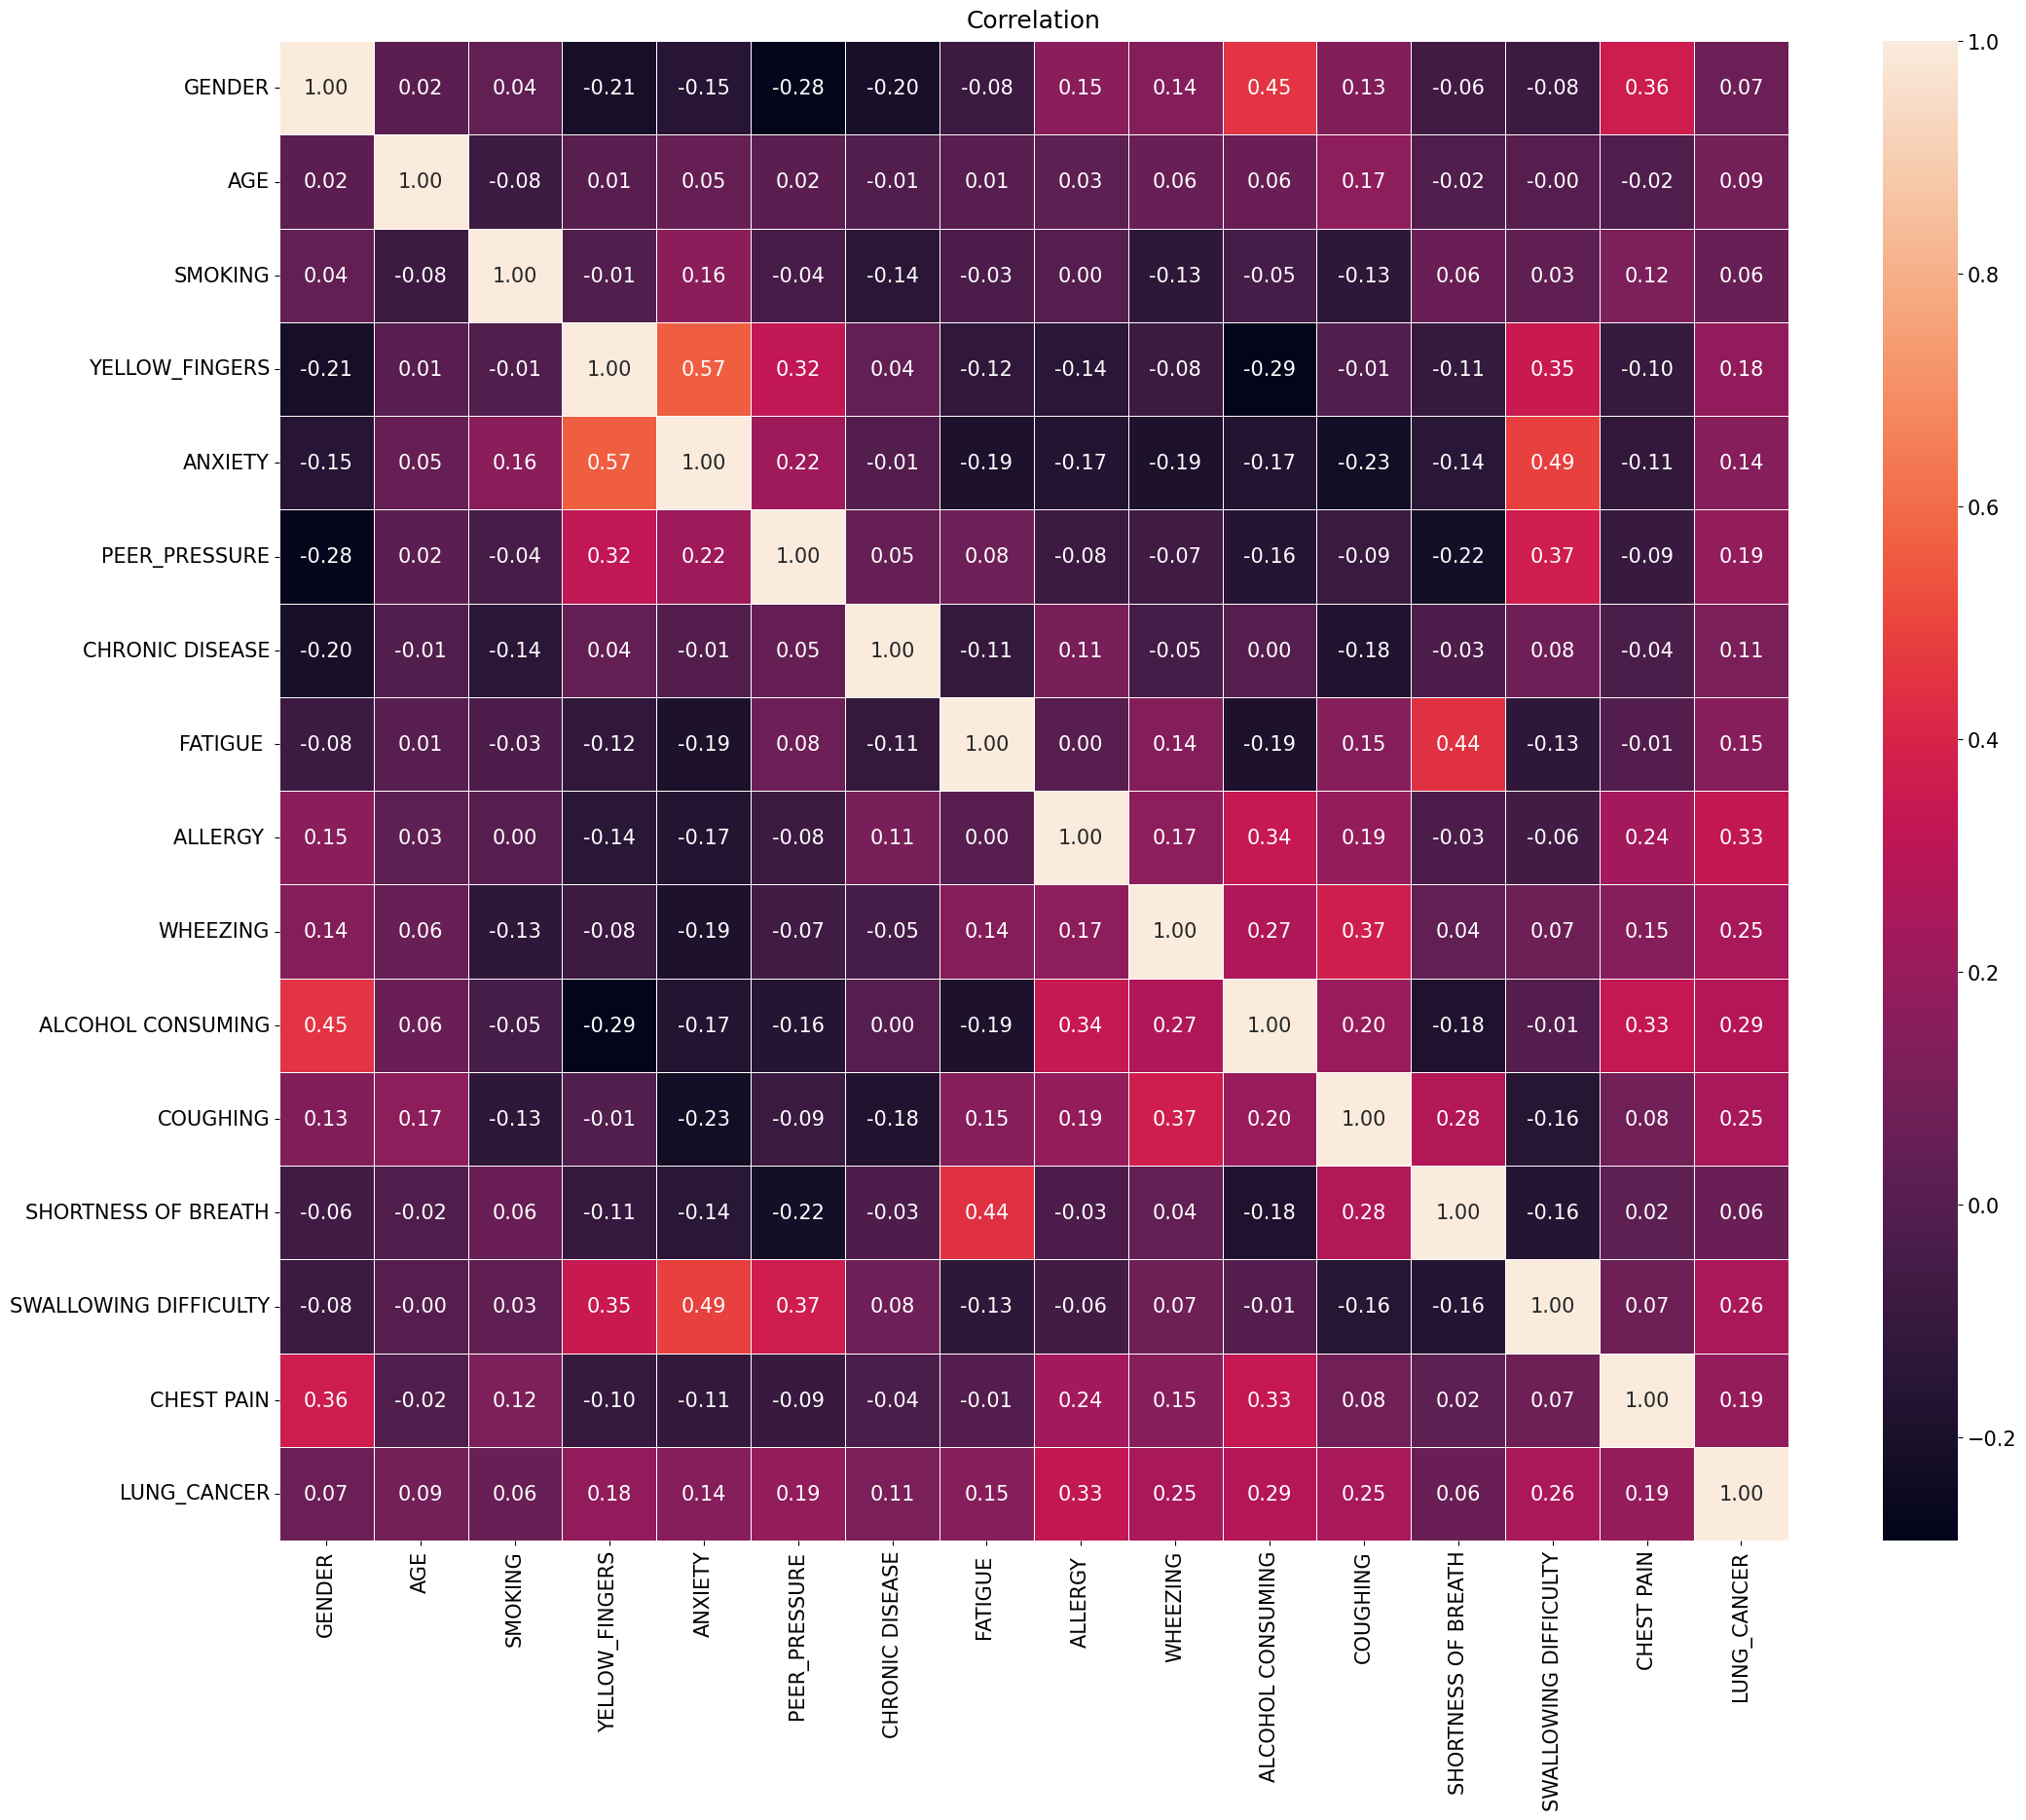

In [60]:
corr = data.corr()
plt.title("Correlation",pad=10)
plt.rcParams.update({"figure.figsize":(15,10),"font.size":15})
c = sns.heatmap(corr,annot=True,fmt="0.2f",linecolor="White",linewidths=0.5,annot_kws={"size": 15})
label = data.columns
c.set_xticklabels(labels=label)
c.set_yticklabels(labels=label)
plt.show()

In [132]:
lc = data["LUNG_CANCER"].value_counts().to_dict()
N = lc[0]
Y = lc[1]

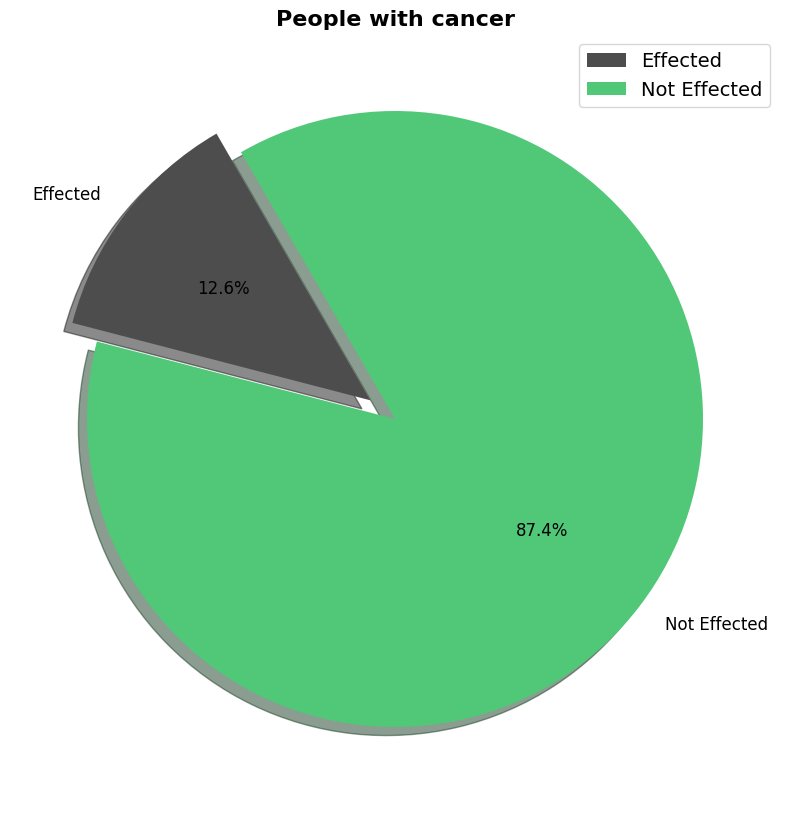

In [133]:
plt.title('People with cancer', fontsize=16, fontweight='bold')
plt.rcParams.update({"figure.figsize":(15,10),"font.size":12})
plt.pie([N,Y],autopct='%0.1f%%',labels=["Effected","Not Effected"],startangle=120,colors=["#4d4d4d","#50c878"],explode=[0.1,0],shadow=True)
plt.legend(loc='best', fontsize=14)
plt.show()

In [139]:
lc_predicted = pd.DataFrame(log_pred)
lc_predicted = lc_predicted.value_counts().to_dict()
N1 = lc_predicted[0,]
Y1 = lc_predicted[1,]

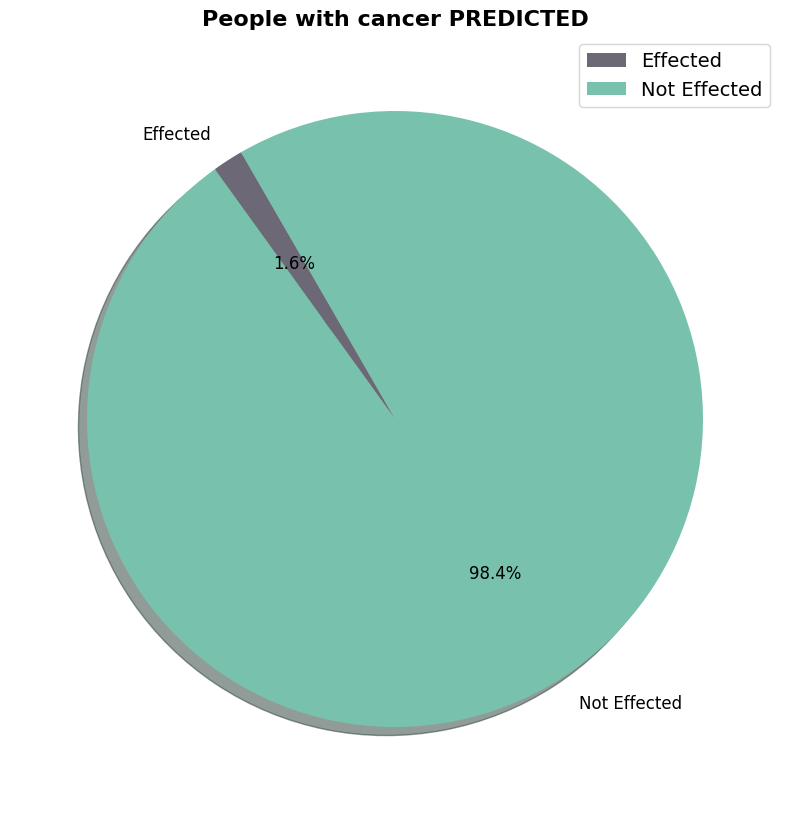

In [145]:
plt.title('People with cancer PREDICTED', fontsize=16, fontweight='bold')
plt.rcParams.update({"figure.figsize":(15,10),"font.size":12})
plt.pie([N1,Y1],autopct='%0.1f%%',labels=["Effected","Not Effected"],startangle=120,colors=reversed(["#78c2ad", "#6d6875"]),shadow=True)
plt.legend(loc='best', fontsize=14)
plt.show()